# Let's create a model code for downloading a file
## Importing libraries 

In [1]:
import os
import requests
import pandas as pd
import zipfile

## A base code 

In [38]:
filename = '../HCEPDB_moldata.zip'
if os.path.exists(filename):
  print("wahoo!")
else:
    url = 'http://faculty.washington.edu/dacb/HCEPDB_moldata.zip'
    req = requests.get(url)
    assert req.status_code == 200 # to check the download successful 
    with open(filename, 'wb') as f:
        f.write(req.content)
csv_filename = 'HCEPDB_moldata.csv'
zf = zipfile.ZipFile(filename)
data = pd.read_csv(zf.open(csv_filename))

wahoo!


## Let's try several files to download together!

### Create `new_name` function

In [54]:
def new_name(name, number):
    '''this gets a patterned file name and the number of the file name sequence
    to create the number of file names in the same pattern
    '''
    new_file = []
    for i in range(number):
        new_file.append(name.replace("moldata", "moldata_set"+str(i+1)))
    return new_file 

In [41]:
filenames = new_name('HCEPDB_moldata.zip', 3)

In [42]:
data = []
for filename in filenames: 
    if os.path.exists(filename):
      print("wahoo!")
    else:
        url = 'http://faculty.washington.edu/dacb/'+filename
        req = requests.get(url)
        assert req.status_code == 200 # to check the download successful 
        with open(filename, 'wb') as f:
            f.write(req.content)
            
    csv_filename = filename.strip('zip')+'csv'
    zf = zipfile.ZipFile(filename)       
    data.append(pd.read_csv(zf.open(csv_filename)))

wahoo!
wahoo!
wahoo!


> Now these three files are downloaded to the variable named data. Let's see each data file. 

## First data file

In [51]:
data[0].describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06,1.106498e+06
mean,1.208288e+06,3.995769e+02,3.670731e+00,5.171753e-01,1.222160e+02,-5.117175e+00,1.904693e+00,-3.212482e+00
std,8.126608e+05,5.868785e+01,2.337513e+00,2.707951e-01,6.559076e+01,2.707951e-01,4.035945e-01,3.841084e-01
min,7.000000e+00,1.682378e+02,3.604066e-05,1.236100e-05,5.129359e-01,-6.695959e+00,7.448349e-01,-3.999994e+00
25%,5.479355e+05,3.584480e+02,1.860519e+00,3.177876e-01,6.967192e+01,-5.292169e+00,1.606785e+00,-3.512764e+00
50%,1.095274e+06,3.995153e+02,3.100304e+00,4.953169e-01,1.114687e+02,-5.095317e+00,1.894533e+00,-3.206734e+00
75%,1.645769e+06,4.433908e+02,5.148094e+00,6.921690e-01,1.641510e+02,-4.917788e+00,2.194588e+00,-2.921657e+00
max,3.102846e+06,6.375008e+02,1.112053e+01,2.095959e+00,3.771846e+02,-4.600012e+00,3.803964e+00,-1.148421e+00


In [62]:
data[0].head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
3,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1
4,1310744,C1C=CC=C1c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2ccc...,C24H13N3SSe,454.4137,5.605135,0.951911,90.622776,-5.551911,2.029717,-3.522194,C1=CC=C(C1)c1cc2[se]c3c(c4nsnc4c4ccncc34)c2c2c...


In [73]:
data[0].iloc[:,3].head()

0    394.3151
1    400.4135
2    319.4448
3    379.3398
4    454.4137
Name: mass, dtype: float64

In [72]:
list(range(3,6,1))

[3, 4, 5]

In [124]:
list_1 = []
for i in range(3,6,1):
    list_1.append(data[0].iloc[:,i])
    
list_1[0].head()

0    394.3151
1    400.4135
2    319.4448
3    379.3398
4    454.4137
Name: mass, dtype: float64

In [88]:
a = [1,2,3]
b = [4,5,6]
c = [a, b]
c

[[1, 2, 3], [4, 5, 6]]

In [119]:
(a + b)

[1, 2, 3, 4, 5, 6]

In [87]:
print(list_1[0].shape)
print(list_1[1].shape)
(list_1[0] + list_1[1]).shape

(1106498,)
(1106498,)


(1106498,)

> Wow, it seems this one behaves different from `list`. It turns out it is `pandas series`. 

## Second data file

In [52]:
data[1].describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.098540e+05,109854.000000,109854.0,109854.0,109854.000000,109854.000000,109854.000000,109854.000000
mean,1.394458e+06,426.617971,0.0,0.0,70.156833,-5.061059,1.551463,-3.509596
std,8.741754e+05,63.530407,0.0,0.0,88.828024,0.542847,0.318191,0.671852
min,2.100000e+01,170.214000,0.0,0.0,0.000000,-7.512315,-0.002940,-6.086537
25%,6.496908e+05,380.479200,0.0,0.0,0.000000,-5.514987,1.313818,-4.065948
50%,1.307578e+06,425.570900,0.0,0.0,0.000000,-5.185462,1.515183,-4.008750
75%,2.108075e+06,474.552700,0.0,0.0,140.062566,-4.539314,1.762868,-2.870962
max,3.102810e+06,636.401100,0.0,0.0,397.038257,-3.632374,3.361447,-1.173109


> Now, let's try `tuple data`.  

In [96]:
tuple_1 = tuple(data[1].iloc[:,3])

In [97]:
tuple_2 = tuple(data[1].iloc[:,4])

In [102]:
print(len(tuple_1))
print(len(tuple_2))

109854
109854


In [103]:
print(len(tuple_1 + tuple_2))

219708


In [94]:
(1,2,3) + (1,2)

(1, 2, 3, 1, 2)

> Tuple behaves as expected! 

## Third data file

In [53]:
data[2].describe()

,id,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha
count,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06,1.106497e+06
mean,1.442780e+06,4.304538e+02,4.568132e+00,6.418354e-01,1.237180e+02,-5.241835e+00,1.890471e+00,-3.351364e+00
std,8.817543e+05,5.644533e+01,2.393552e+00,2.843694e-01,6.331331e+01,2.843694e-01,3.898511e-01,3.358991e-01
min,1.000000e+00,1.721822e+02,1.631420e-06,2.056039e-07,1.124616e+00,-6.778957e+00,6.650433e-01,-4.000000e+00
25%,6.876230e+05,3.964888e+02,2.671723e+00,4.413994e-01,7.457651e+01,-5.421049e+00,1.610790e+00,-3.617982e+00
50%,1.376160e+06,4.326268e+02,4.046804e+00,6.204899e-01,1.147000e+02,-5.220490e+00,1.873049e+00,-3.340769e+00
75%,2.187164e+06,4.655839e+02,6.222132e+00,8.210489e-01,1.632060e+02,-5.041399e+00,2.155169e+00,-3.088315e+00
max,3.102853e+06,6.863590e+02,1.113013e+01,2.178957e+00,3.970380e+02,-4.600000e+00,3.709872e+00,-2.094457e+00


In [107]:
dict_1 = {}
for i in range(3,6,1):
    dict_1[i-3] = data[2].iloc[:,i]
    
print(dict_1[0].head())
print(dict_1[1].head())
print(dict_1[2].head())

0    403.5091
1    460.4419
2    490.5260
3    360.4322
4    517.5300
Name: mass, dtype: float64
0    4.279665
1    5.845911
2    8.873984
3    5.051803
4    9.127722
Name: pce, dtype: float64
0    0.787542
1    0.891818
2    0.563516
3    1.565185
4    0.651534
Name: voc, dtype: float64


In [108]:
dict_1.keys()

dict_keys([0, 1, 2])

In [111]:
dict_1.values()

dict_values([0          403.5091
1          460.4419
2          490.5260
3          360.4322
4          517.5300
5          515.4382
6          514.5657
7          447.5487
8          480.4515
9          447.4508
10         453.5689
11         476.6188
12         450.6246
13         432.4618
14         450.6166
15         430.4994
16         416.4183
17         459.5517
18         470.6240
19         447.4428
20         477.5050
21         495.5661
22         518.4122
23         434.4380
24         410.5214
25         459.5637
26         442.5006
27         443.4887
28         530.5171
29         403.5171
             ...   
1106467    567.6668
1106468    483.7863
1106469    520.7728
1106470    520.7728
1106471    485.7625
1106472    427.6983
1106473    467.7193
1106474    467.7113
1106475    472.7514
1106476    467.7193
1106477    504.7058
1106478    503.7217
1106479    471.7753
1106480    534.8756
1106481    508.4810
1106482    472.7634
1106483    535.8557
1106484    501.7495
1106485

> By creating a function named `new_name`, the three series of subfiles were created. Furthermore, using the for loop, the three files having the created subfile names were downloaded, unziped and stored into the variable named data in the form of a list of `pandas` dataframes. 

## Now, let's try to plot to figure out the differences of the three sets.

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

> Be careful! list `sort()` doesn't work here for pandas series sort. Instead, use `sort_values()`! 

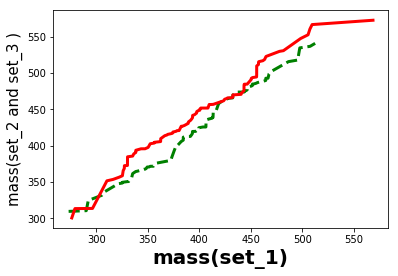

In [157]:
plt.plot(data[0]['mass'].sample(n=100).sort_values(ascending=True), 
         data[1]['mass'].sample(n=100).sort_values(ascending=True), 'g:', linestyle='dashed', linewidth=3)
plt.plot(data[0]['mass'].sample(n=100).sort_values(ascending=True), 
         data[2]['mass'].sample(n=100).sort_values(ascending=True), 'r-', linewidth=3)
plt.xlabel('mass(set_1)', fontweight='bold', fontsize = 20)
_ = plt.ylabel('mass(set_2 and set_3 )', fontsize=15)

## Let's try to use `for loop` for the several plots!

In [143]:
list[i]+'(set_1)'

'pce(set_1)'

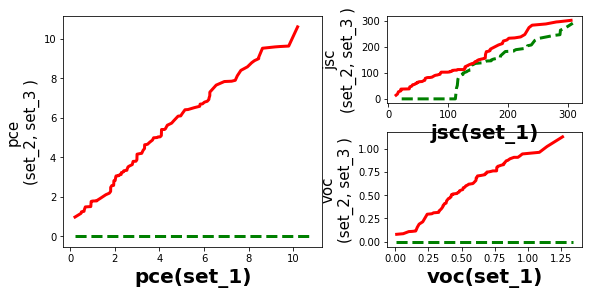

In [159]:
fig = plt.figure(figsize=(9, 4))
ax = fig.add_axes([0, 0, 0.4, 0.8])
ax1 = fig.add_axes([0.5, 0, 0.3, 0.4])
ax2 = fig.add_axes([0.5, 0.5, 0.3, 0.3])

list = ['pce', 'voc', 'jsc']
pl = [ax, ax1, ax2]

for i in range(3):
    pl[i].plot(data[0][list[i]].sample(n=100).sort_values(ascending=True), 
         data[1][list[i]].sample(n=100).sort_values(ascending=True), 'g:', linestyle='dashed', linewidth=3)
    pl[i].plot(data[0][list[i]].sample(n=100).sort_values(ascending=True), 
         data[2][list[i]].sample(n=100).sort_values(ascending=True), 'r-', linewidth=3)
    pl[i].set_xlabel(list[i]+'(set_1)', fontweight='bold', fontsize = 20)
    pl[i].set_ylabel(list[i]+'\n(set_2, set_3 )', fontsize=15)


> Now, it is clear that the data_set2 has `zero` in the columns, `pce` and `voc`. We need to investigate why the set2 has complete `zeros`. 